In [1]:
import pandas as pd
from collections import Counter

# Read the two CSV files
df_scores = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/scenicornot.metadata.csv')
df_predictions = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/type_of_landscape_predictions.csv')  # Contains image names, predicted classes, and probabilities

# Assume the first column in df_scores is the image name and the 8th column is the score
df_scores = df_scores[['filename', 'average']]  # Extract the columns for image names and scores

# Divide the image scores into ten categories
df_scores['score_category'] = pd.cut(df_scores['average'], bins=10, labels=False)

# Merge the two dataframes based on the image name
df_merged = pd.merge(df_scores, df_predictions, on='filename')

# Extract the top 5 predicted classes, assuming every two columns are the class and the corresponding probability
df_merged['top5_predictions'] = df_merged.apply(lambda row: tuple(row[1:10:2]), axis=1)  # Assuming every two columns are class and probability, extract the predicted classes

# Count the most frequent prediction combinations and the total number of images in each score category
most_common_predictions_by_category = {}
total_images_by_category = {}

for category in sorted(df_merged['score_category'].unique()):
    category_data = df_merged[df_merged['score_category'] == category]
    prediction_combinations = category_data['top5_predictions']
    
    # Use Counter to count the most frequent prediction combinations
    most_common = Counter(prediction_combinations).most_common(1)[0]  # Return the most common prediction combination and its count
    most_common_predictions_by_category[category] = most_common
    total_images_by_category[category] = len(category_data)  # Count the total number of images in this category

# Output the total number of images and the most common prediction combination in each score category
for category in sorted(total_images_by_category.keys()):
    total_images = total_images_by_category[category]
    most_common = most_common_predictions_by_category[category]
    print(f"Score Category {category}: Total Images: {total_images}, Most Common Prediction: {most_common[0]}, Count: {most_common[1]}")


Score Category 0: Total Images: 11783, Most Common Prediction: (1.5, 'highway', 'field/wild', 'desert/sand', 'forest_road'), Count: 13
Score Category 1: Total Images: 23735, Most Common Prediction: (2.0, 'highway', 'field/wild', 'forest_road', 'desert/sand'), Count: 22
Score Category 2: Total Images: 36692, Most Common Prediction: (3.0, 'field/wild', 'forest_path', 'forest_road', 'driveway'), Count: 23
Score Category 3: Total Images: 47629, Most Common Prediction: (4.0, 'field/wild', 'forest_path', 'forest_road', 'driveway'), Count: 43
Score Category 4: Total Images: 40964, Most Common Prediction: (5.0, 'forest_path', 'forest_road', 'field/wild', 'driveway'), Count: 28
Score Category 5: Total Images: 26402, Most Common Prediction: (6.0, 'tundra', 'pasture', 'field_road', 'valley'), Count: 27
Score Category 6: Total Images: 15272, Most Common Prediction: (7.0, 'tundra', 'mountain_path', 'valley', 'mountain'), Count: 27
Score Category 7: Total Images: 6993, Most Common Prediction: (7.5, 

In [2]:
import pandas as pd
from collections import Counter

# Read the two CSV files
df_scores = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/scenicornot.metadata.csv')
df_predictions = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/type_of_landscape_predictions.csv')  # Contains image names, predicted classes, and probabilities

# Assume the first column in df_scores is the image name and the 8th column is the score
df_scores = df_scores[['filename', 'average']]  # Extract the columns for image names and scores

# Divide the image scores into ten categories
# df_scores['score_category'] = pd.cut(df_scores['average'], bins=10, labels=False)
df_scores['score_category'] = pd.qcut(df_scores['average'], q=10, labels=False)

# Merge the two dataframes based on the image name
df_merged = pd.merge(df_scores, df_predictions, on='filename')

# Extract the top 5 predicted classes, assuming every two columns are the class and the corresponding probability
# Here, we convert the top 5 class columns into a list of classes for each row
df_merged['top5_predictions'] = df_merged.apply(lambda row: list(row[3:12:2]), axis=1)

# Count the most frequent 5 landscape classes in each score category
top5_common_classes_by_category = {}
total_images_by_category = {}

for category in sorted(df_merged['score_category'].unique()):
    category_data = df_merged[df_merged['score_category'] == category]
    
    # Flatten the list of top-5 predictions and count the most common classes
    all_predictions = [cls for sublist in category_data['top5_predictions'] for cls in sublist]
    
    # Get the most common 5 classes and their counts
    most_common_classes = Counter(all_predictions).most_common(5)
    top5_common_classes_by_category[category] = most_common_classes
    total_images_by_category[category] = len(category_data)  # Count the total number of images in this category

# Output the total number of images and the most common 5 landscape classes in each score category
for category in sorted(total_images_by_category.keys()):
    total_images = total_images_by_category[category]
    most_common_classes = top5_common_classes_by_category[category]
    print(f"Score Class {category}: Total Images: {total_images}")
    for landscape_class, count in most_common_classes:
        print(f"    Landscape Class: {landscape_class}, Count: {count}")


Score Class 0: Total Images: 21589
    Landscape Class: field/wild, Count: 5134
    Landscape Class: highway, Count: 4576
    Landscape Class: industrial_area, Count: 4411
    Landscape Class: house, Count: 4098
    Landscape Class: residential_neighborhood, Count: 3736
Score Class 1: Total Images: 23333
    Landscape Class: field/wild, Count: 7842
    Landscape Class: farm, Count: 4945
    Landscape Class: house, Count: 4837
    Landscape Class: driveway, Count: 4227
    Landscape Class: highway, Count: 4198
Score Class 2: Total Images: 19793
    Landscape Class: field/wild, Count: 6769
    Landscape Class: farm, Count: 5302
    Landscape Class: pasture, Count: 4878
    Landscape Class: field/cultivated, Count: 3883
    Landscape Class: corn_field, Count: 3822
Score Class 3: Total Images: 26919
    Landscape Class: field/wild, Count: 8717
    Landscape Class: pasture, Count: 8188
    Landscape Class: farm, Count: 7813
    Landscape Class: field/cultivated, Count: 5882
    Landscape Cl

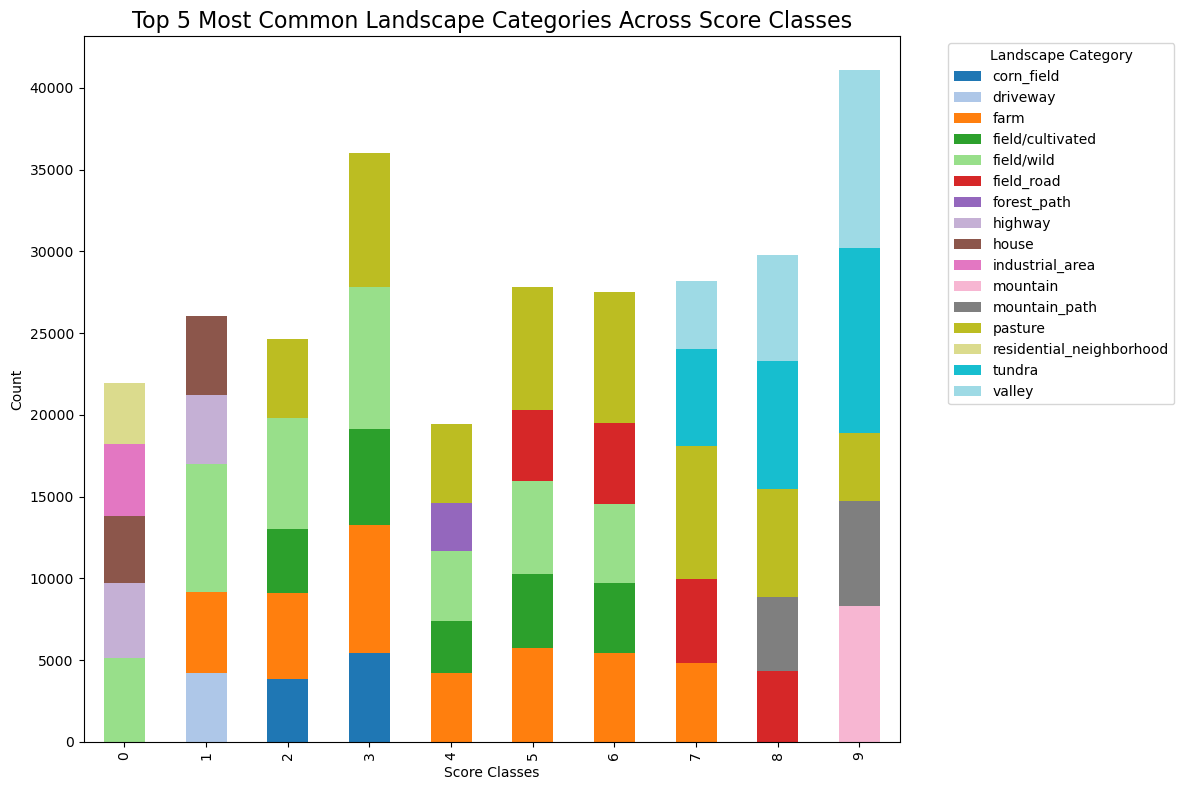

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data into a DataFrame for easy plotting
data = []
for category, most_common_classes in top5_common_classes_by_category.items():
    for landscape_class, count in most_common_classes:
        data.append([category, landscape_class, count])

df = pd.DataFrame(data, columns=['Score Class', 'Landscape Category', 'Count'])

# Pivot the data to get Landscape Classes as columns
pivot_df = df.pivot(index='Score Class', columns='Landscape Category', values='Count').fillna(0)

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Top 5 Most Common Landscape Categories Across Score Classes', fontsize=16)
plt.xlabel('Score Classes')
plt.ylabel('Count')
plt.legend(title='Landscape Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/home/ubuntu/landscape-aesthetics/reports/figures/common_landscape_classes_Equal_Distribution.jpg")
plt.show()


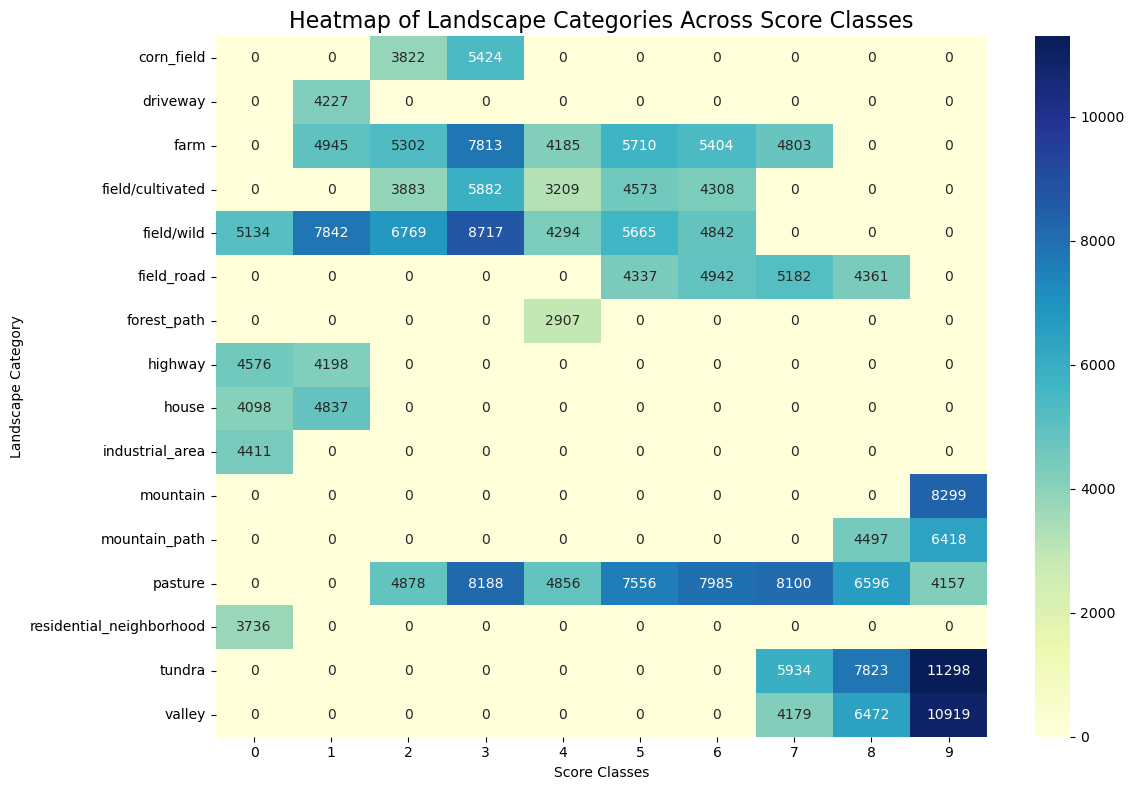

In [6]:
# 假设 df 是一个包含风景种类、评分类别和计数的 DataFrame
# 确保 df 包含三列: 'Landscape Class', 'Score Category', 'Count'
import seaborn as sns
# Prepare the data for the heatmap
heatmap_data = df.pivot(index='Landscape Category', columns='Score Class', values='Count').fillna(0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")

# Add title and labels
plt.title('Heatmap of Landscape Categories Across Score Classes', fontsize=16)
plt.xlabel('Score Classes')
plt.ylabel('Landscape Category')
plt.tight_layout()

# Show the plot
plt.savefig("/home/ubuntu/landscape-aesthetics/reports/figures/common_landscape_classes_equal_distribution_heatmap.jpg")
plt.show()
